# Naive mid price estimation
## Myopic mid estimation


Assume that for one particular security, we observe $n$ sets of best bid and offer markets, one set from each potential venue or liquidity provider. That is, we observe $\{bid_i, ask_i\}_{i=1}^{n}$, and we want to utilise this information to estimate where the true theorethical price (TP) $p$ is.

For convenience, we define the simple mid price $m_i := \frac{b_i+a_i}{2}$ and the spread $s_i := a_i-b_i$.

### When $\{P_i\sim f(\mu_i, \sigma_i^2)\}_{i=1}^n$

We assume that each provider has their own private estimate $P_i$ of the true theorethical price, and then makes a market by quoting observable bid and ask prices $\{b_i, a_i\}$, not necessarily symmetrical, around this price. Hence we can arguably assume that under most scenarios $p_i \in [b_i, a_i]$. However, without any prior knowledge of their skewing behaviour, it is reasonable to believe that a point estimate of their TP is the simple mid $\mathbb{E}[P_i] = m_i$. and that the width of the spread is a measure of range, or less restrictive, dispersion, which we measure by the variance. To generalize assume that their stochastic TP is $P_i \sim f_i$ with mean $\mu_i = (b_i+a_i)/2$ and stdev $\sigma_i \propto s_i$.

here we assume that each theoreti
We now want to form the optimum combined linear estimate given $\{P_i\sim f_i\}_{i=1}^n$, which is a weighted mean of the observations
\begin{align}
    \hat{P}_n^* := \frac{\sum_{i=1}^n w_i P_i}{\sum_{i=1}^n w_i} = \sum_{i=1}^n \lambda_i P_i  \quad where \quad \lambda_i := \frac{w_i}{\sum_k w_k}
\end{align}

Now we are looking for the optimum estimate with the smallest variance, $\min_{\lambda} \mathbb{V}[\hat{P}_n^*]$ which is given by the weights

\begin{align}
    \lambda_i = \frac{1/\sigma_i^{2}}{\sum_k 1/\sigma_k^{2}}
\end{align}

and we get that
\begin{align}
    \mu_n^* := \mathbb{E}[\hat{P}_n^*] = \sum_{i=1}^n \lambda_i \mu_i = \frac{\sum_i 1/\sigma_i^2 \cdot \mu_i}{\sum_k 1/\sigma_k^2}, \\
    \sigma_n^{2*} := \mathbb{V}[\hat{P}_n^*] = \sum_{i=1}^n \lambda^2 \sigma_i^2 = \frac{1}{\sum_k 1/\sigma_i^2}.
\end{align}

Now what distribution is $f_i$? Without any prior knowdledge, a uniform distribution covering the spread, i.e. $\mathcal{U}(b_i, a_i)$ seems reasonable as it has a fixed range covering the spread. However, it has one big problem, which is that a linear sum of uniform densities isn't uniform. To circumwent this, we can use the Gaussian density, which will have two consequences. First, it will no longer have finite support, allowing the mid to be outside the spread. Second, in contrast to the uniform density, it puts more weight towards non skewed pricing behaviour. None of these two is a problem however, as the tails outside the spread are symmetric and don't affect the final estimate (only density location and variances do). The case of larger likelihood near the middle of the spread can possibly be seen as a feature.

Assuming Gaussian observations, the final estimate is
\begin{align}
    \mathcal{N}(\mu_n^*, \sigma_n^{2*}),
\end{align}
while the moment matched uniform distibution of the final estimate is given by
\begin{align}
    \mathcal{U}(\mu_n^* - \sqrt{3}\sigma_n^*, \mu_n^* + \sqrt{3}\sigma_n^*)
\end{align}

### On the relation to online Kalman Gain
Note that the above procedure of finding the weights is identical to the derivation of the Kalman gain for the Kalman filter. The Kalman filter as an optimal filter since the Kalman gain yields the minimum variance estimate. If our current prior estimate from $n-1$ observations is given by $\hat{P}_{n-1}^*$, our new n'th new measurement is given by $P_{n}$, and the weight assigned to the new measurement is $K_n$, also known as the Kalman gain, then the combined new estimate is

\begin{align}
    \hat{P}_n^* = (1-K_{n})\hat{P}_{n-1}^* + K_{n} P_{n}
\end{align}
By minimizing $\min_{K} \mathbb{V}[\hat{P}_n^*]$, we arrive at
\begin{align}
    K_n =& \frac{\mathbb{V}[\hat{P}_{n-1}^*]}{\mathbb{V}[\hat{P}_{n-1}^*] + \mathbb{V}[P_n]} := \frac{\sigma_n^{2*}}{\sigma_n^{2*} + \sigma_n^{2}},
\end{align}
and we get that
\begin{align}
    \mu_n^* :&= (1-K_n)\mu_{n-1}^* + K_n \mu_n , \\
    \sigma_n^{2*} :&= (1-K_n)\sigma_{n-1}^{2*} = \frac{1}{1/\sigma_{n-1}^{2*} + 1/\sigma_{n}^2}.
\end{align}
If we before the first measurement have no prior knowledge of the state, we can impose $\sigma_0^{2*}\to \infty$, implying $K_1=1$. In this case, the final state estimation will be identical as of the one made earlier, i.e. a weighted sum of observations, where the weights are the inverse of the variance of each measurement. Note that each Kalman gain $K_i$ does not equal the weight $\lambda_i$, as it is an incremental weighting of the previous measurements only. For the Kalman filter, these results implies a constant deterministic state space model, i.e. the distributions are invariant of time.

## When $P\sim \mathcal{N}_n(\mu, V)$

Now assume that the observations follow a multivariate Gaussian distribution, with known covariance matrix $V$. Minimizing variance as above, yields weight vector

\begin{align}
    \lambda = \frac{V^{-1}\boldsymbol{1}}{\boldsymbol{1}^T V^{-1}\boldsymbol{1}},
\end{align}


with final estimate $\mathcal{N}(\boldsymbol{\mu_n^*}, \sigma_n^{2*})$, with
\begin{align}
    \boldsymbol{\mu_n^*} = \boldsymbol{\lambda} \boldsymbol{\mu} = \frac{\boldsymbol{1}^T V^{-1}}{\boldsymbol{1}^T V^{-1}\boldsymbol{1}}\boldsymbol{\mu}, \\
    \boldsymbol{\sigma_n^{2*}} = \boldsymbol{\lambda}^T V \boldsymbol{\lambda} = \frac{1}{\boldsymbol{1}^T V^{-1}\boldsymbol{1}}.
\end{align}

### On the relation to Minimum Variance Portfolio
The above case of multivariate Gaussian, the solution is identical to the Minimum variance portfolio in the CAPM framework.


## Maximum-Relevance Weighted Likelihood Estimators (REWL)
Previously, we assumes that each observation is drawn from its own distribution, and we aim to find the optimal linear estimator, by minimizing the uncertainty (variance) of the estimate.

We we instead assume that all observations are drawn from the same, or similar, unknown distribution, and weighting each observation by its relevance, we arrive at the REWL estimator

\begin{align}
    L(\theta) = \prod_{i=1}^n f(p_i; \theta)^{\lambda_i},
\end{align}
where $\lambda_i$ is the relavance weight associated with observation $p_i$, such that $\sum_i \lambda_i=1$. These weights are either set exogenously, or by e.g. cross validation.

For more information about weighted maximum likelihood, see

- Hu, F., Rosenberger, W (1997). The Asymptotic Properties of the Maximum-Relevance Weighted Likelihood Estimators. *The Canadian Journal of Statistics* **25** 45-59.
- Hu, F., Rosenberger, W. & Zidek, J. Relevance weighted likelihood for dependent data. *Metrika* **51**, 223–243.

### When $P_i \sim \mathcal{N}(\mu, \sigma^2)$

If we assume that all observations are coming from the same Guassian distribution with $\theta=\{\mu, \sigma^2\}$, where mean and variance are unknown, the likelihood is maximized for

\begin{align}
    \hat{\mu} =& \sum_i \lambda_i p_i, \\
    \hat{\sigma}^2 =& \sum_i \lambda_i(p_i-\hat{\mu})^2, \\
    \hat{\sigma}^2_{UB} =& \frac{1}{1-\sum_i \lambda_i^2}\hat{\sigma}^2, \\
\end{align}
The variance of our mean estimator is $\mathbb{V}[\hat{\mu}] = \sigma^2\sum_i\lambda_i^2$. Using our unbiased estimate of the variance we arrive at
\begin{align}
    \widehat{\mathbb{V}[\hat{\mu}]} =& \frac{\sum_i \lambda_i^2}{1-\sum_i \lambda_i^2}\hat{\sigma}^2_{UB} = \frac{\sum_i \lambda_i^2}{(1-\sum_i \lambda_i^2)^2}\hat{\sigma}^2.
\end{align}

### When $P_i \sim \mathcal{N}(\mu, \sigma_i^2)$
If we assume that all observations are coming from different Guassian distributions but different known variances but shared an unknown mean, the likelihood is maximized for

\begin{align}
    \hat{\mu} =& \frac{\sum_i \lambda_i/\sigma_i^2 \cdot p_i}{\sum_i \lambda_i/\sigma_i^2},
\end{align}
and the variance of our mean estimator is given by
\begin{align}
    \mathbb{V}[\hat{\mu}] = \frac{\sum_i \lambda_i}{\sum_i \lambda_i/\sigma_i^2}.
\end{align}


## Robust mean estimation


Assume that the true theoretical price is $p$ and known to all market participants. Consider the three following bid-ask markets, $\{\{p-s/2,p+s/2\},\{p-s/2,p+s/2\},\{p-s/2,p\}\}$. That is, the first two markets are identical with a symmetric spread around $p$, sharing the same mid $m_1=m_2=p$, whereas the third market is nagatively skewed with mid $m_3=p-s/4$. Now, without a robust estimator of the theoretical mid, this skew will lead to our estimator being negatively biased. Hence, since the third market is an outlier to the other two, we would like to compensate for the bias that is introduced.

### Distance Weighted Mean
The algorithm that we will go through here is a weighted mean where each weight is the inverse of sum of distances to the other observations. This will result in central observations having larger weights, while observations outside having lower weights.

\begin{align}
    \hat{P}_n^* := \frac{\sum_{i=1}^n w_i P_i}{\sum_{i=1}^n w_i}  \quad where \quad w_i = \frac{1}{\sum_k |P_i-P_k|}.
\end{align}

## Mode estimation
- Bickel, D.R. and R. Frühwirth. 2006. On a fast, robust estimator of the mode: comparisons to other estimators with applications. Computational Statistics & Data Analysis 50: 3500-3530.

## Median estimation
[Hodges–Lehmann estimator](https://en.wikipedia.org/wiki/Hodges%E2%80%93Lehmann_estimator)


# Example data estimation
 
 - $MLE(m)$:MLE of $\mathcal{N}(\mu| \sigma_i^2)$, unknown mean given known variances. Returns mean point estimate with mean estimation variance.
 - $MLE(m,v)$: MLE of $\mathcal{N}(\mu, \sigma^2)$, unknown mean and variance. Returns mean point estimate with variance point estimate.
 - $MLE(m, var(m) | v_i)$: MLE of $\mathcal{N}(\mu| \sigma_i^2)$, unknown mean given known variances. Returns mean point estimate with mean estimation variance.
 - $KALMAN|m_i, v_i$: Kalman filter given $\mathcal{N}(\mu_i| \sigma_i^2)$. Returns mean point estimate with mean estimation variance.
 - $\text{mode mid}$: Estimation of mode using observation means/mids. Returns mode with bootstrapped variance.
 - $\text{mode bidask}$: Separate estimation of bid mode and ask mode. Note that these mode estimates might not be symmetric around mode of means/mids.
 
The following data weights are used
- $dw$: Distance weights, robust to outliers.
- $vw$: variance weights, weight observations with large uncertanty less. Implied in the Kalman Filter.

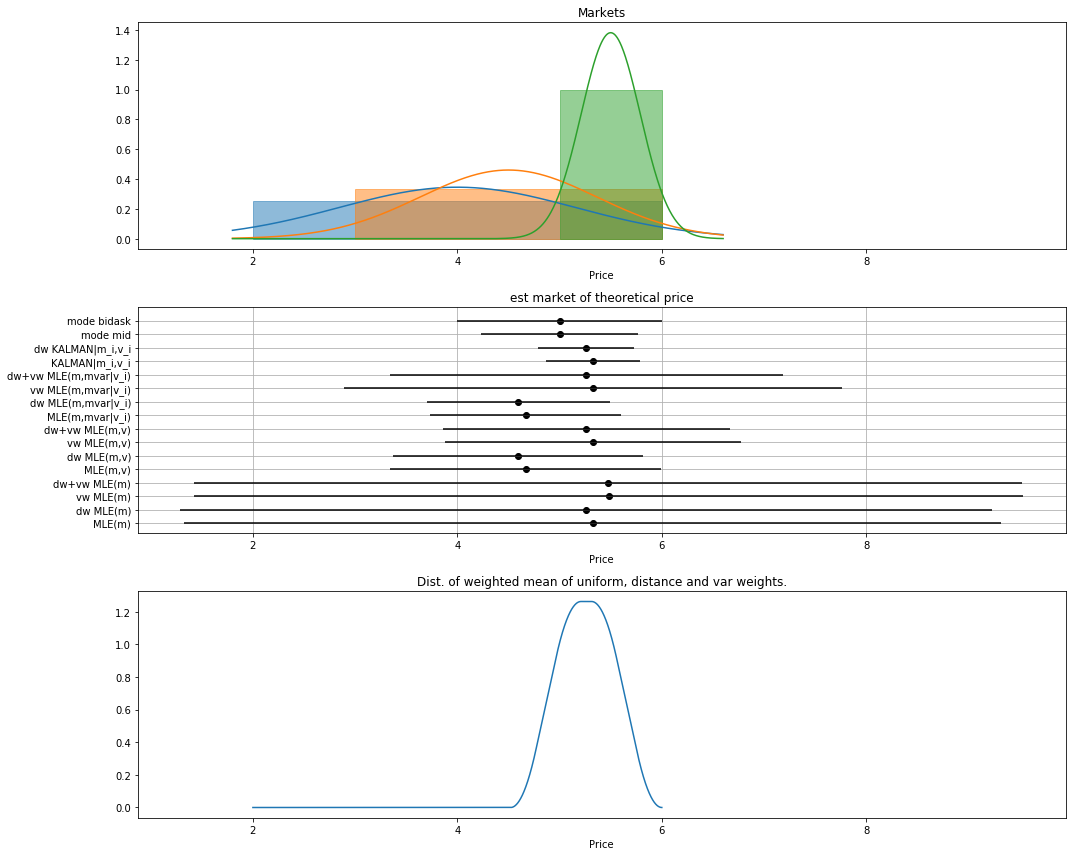

In [1]:
from src.market import Market, DerivedMarket
from src.market_estimation import rewl, kalman, modest, dw, varw, dw_varw
import src.visualize as vis
from matplotlib import pyplot as plt
%matplotlib inline
import warnings


#markets = [Market(2,6), Market(1,7), Market(4,6)]
markets = [Market(2,6), Market(3,6), Market(5,6)]




color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
fig, axs = plt.subplots(3, 1 ,figsize=(15,12), sharex=True)
vis.plot_markets(markets, axs[0], colors=color_cycle)
axs[0].set_title('Markets')
        
warnings.simplefilter("ignore")
estimators = \
    [
        ('MLE(m)', rewl(markets, est='m')),
        ('dw MLE(m)', rewl(markets, est='m', rew=dw)),
        ('vw MLE(m)', rewl(markets, est='m', rew=varw)),
        ('dw+vw MLE(m)', rewl(markets, est='m', rew=dw_varw)),
        ('MLE(m,v)', rewl(markets, est='mv')),
        ('dw MLE(m,v)', rewl(markets, est='mv', rew=dw)),
        ('vw MLE(m,v)', rewl(markets, est='mv', rew=varw)),
        ('dw+vw MLE(m,v)', rewl(markets, est='mv', rew=dw_varw)),
        ('MLE(m,mvar|v_i)', rewl(markets, est='mmvar')),
        ('dw MLE(m,mvar|v_i)', rewl(markets, est='mmvar', rew=dw)),
        ('vw MLE(m,mvar|v_i)', rewl(markets, est='mmvar', rew=varw)),
        ('dw+vw MLE(m,mvar|v_i)', rewl(markets, est='mmvar', rew=dw_varw)),
        ('KALMAN|m_i,v_i', kalman(markets)),
        ('dw KALMAN|m_i,v_i', kalman(markets, rew=dw)),
        ('mode mid', modest(markets, dispersion='bootstrap')),
        ('mode bidask', modest(markets, dispersion='bidask')),
    ]
warnings.resetwarnings()

for i,(label, est) in enumerate(estimators):
    vis.plot_estimator(axs[1], i, est)
    
axs[1].set_yticks(range(len(estimators)))
axs[1].set_yticklabels([e[0] for e in estimators])
axs[1].set_title('est market of theoretical price')
axs[1].grid()


xx, epdf = kalman(markets, rew=dw).uniform_convolution()
axs[2].plot(xx, epdf)
axs[2].set_title('Dist. of weighted mean of uniform, distance and var weights.')

for ax in axs.flatten():
    #plt.setp(ax.get_xticklabels(), visible=True)
    ax.tick_params(labelbottom=True)
    ax.set_xlabel('Price')

fig.tight_layout()
plt.show()